In [ ]:
source("/root/workspace/code/midas/preprocess/utils.R")
setwd("/root/workspace/code/midas/")

base_dir <- "data/raw/atac+rna/sea/BM_Tcelldep"
frag_path <- pj(base_dir, "tcelldep_fragments.tsv.gz")
count_path1 <- pj(base_dir, "GSM6005306_BM_Tcelldep_Rep1_filtered_feature_bc_matrix.h5")
count_path2 <- pj(base_dir, "GSM6005308_BM_Tcelldep_Rep2_filtered_feature_bc_matrix.h5")

output_dir <- pj(base_dir, "seurat")
mkdir(output_dir, remove_old = T)

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Genome matrix has multiple modalities, returning a list of matrices for this genome



An object of class Seurat 
26020 features across 6305 samples within 1 assay 
Active assay: rna (26020 features, 0 variable features)

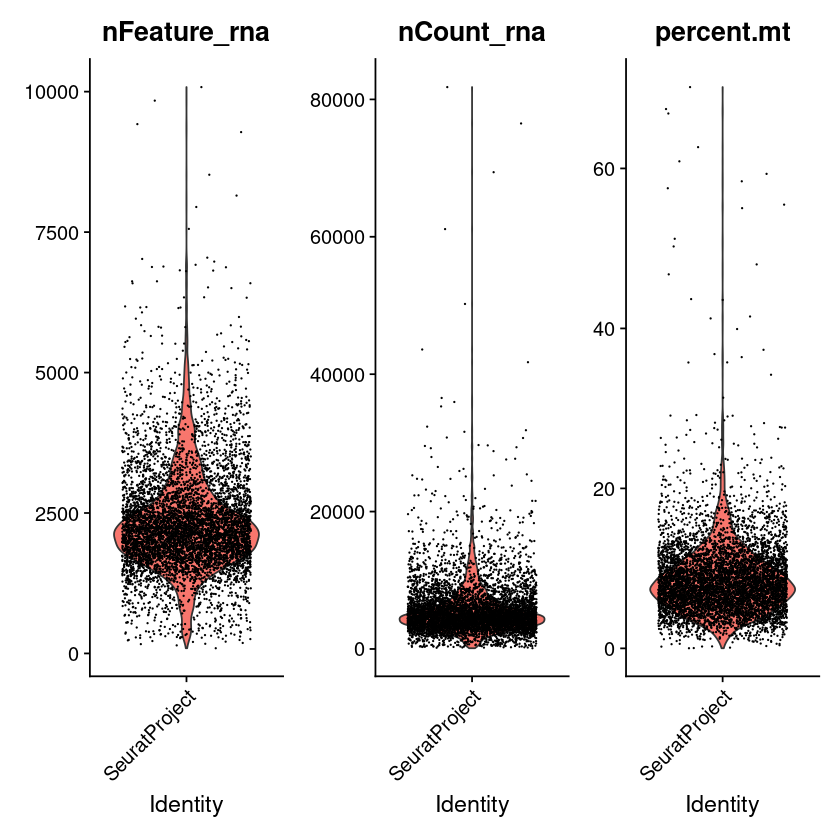

An object of class Seurat 
26020 features across 5846 samples within 1 assay 
Active assay: rna (26020 features, 0 variable features)

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Genome matrix has multiple modalities, returning a list of matrices for this genome



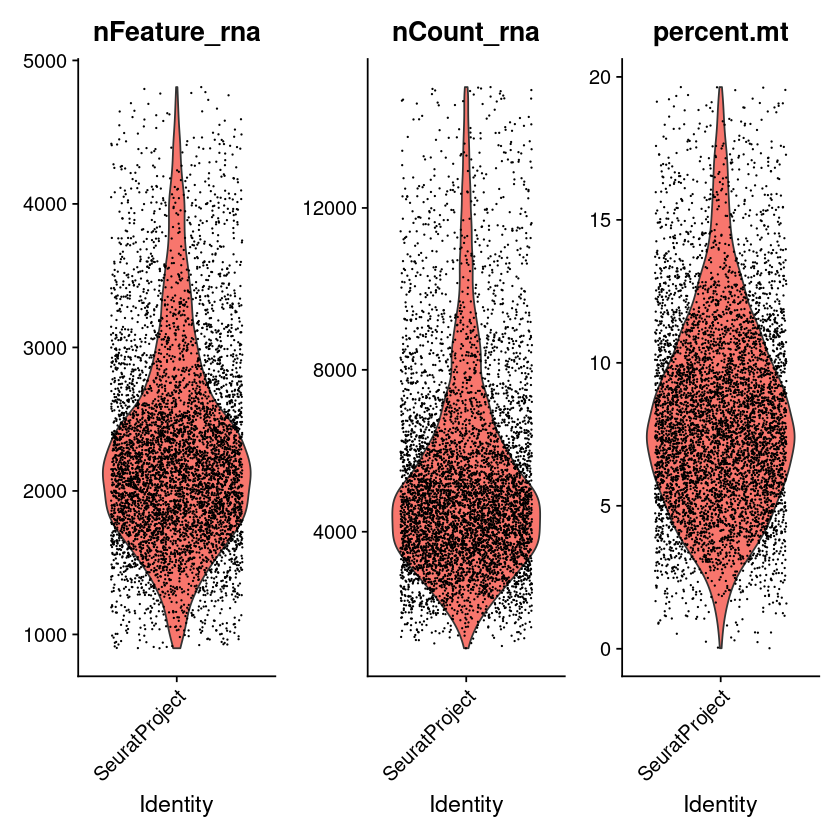

An object of class Seurat 
25217 features across 5439 samples within 1 assay 
Active assay: rna (25217 features, 0 variable features)

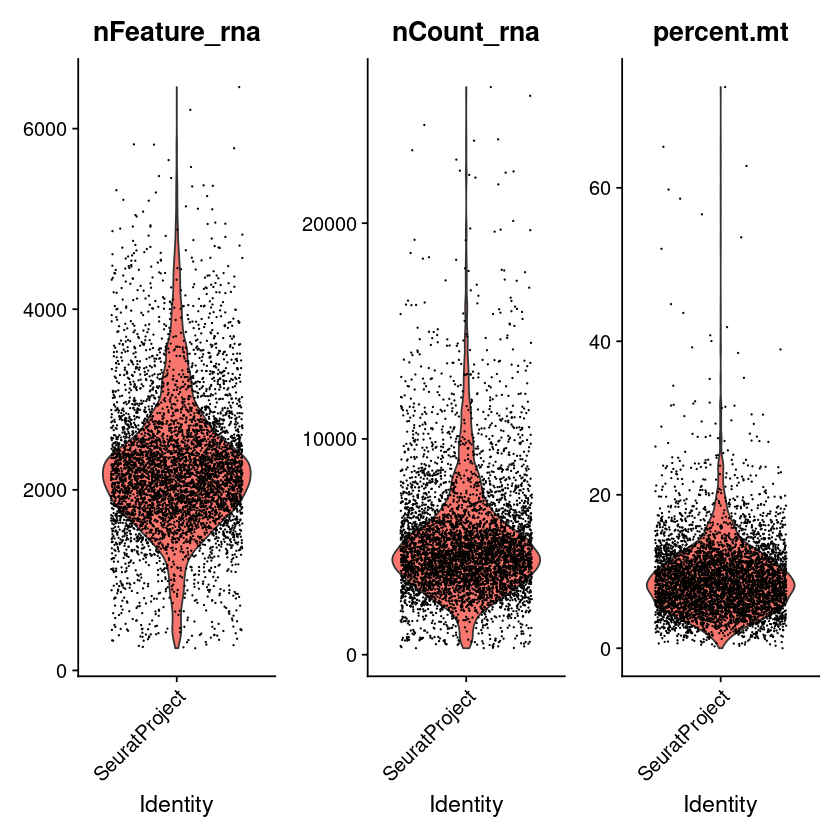

An object of class Seurat 
25217 features across 5101 samples within 1 assay 
Active assay: rna (25217 features, 0 variable features)

An object of class Seurat 
26828 features across 10947 samples within 1 assay 
Active assay: rna (26828 features, 0 variable features)

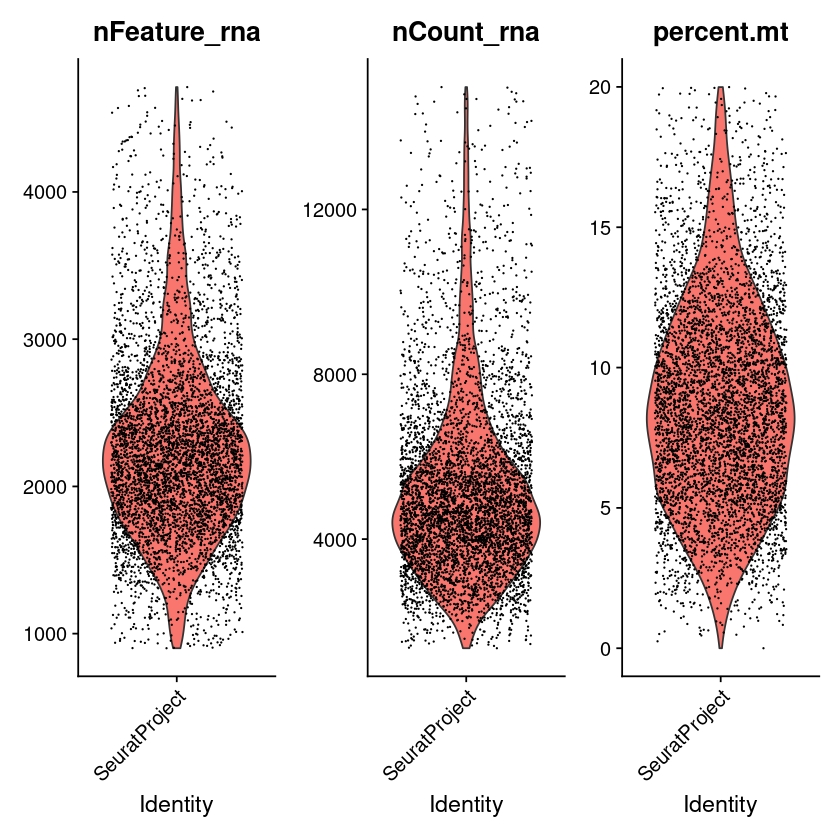

In [2]:
# RNA
# load data
counts <- Read10X_h5(count_path1)
rna_counts <- counts$`Gene Expression`
rna <- gen_rna(rna_counts)
VlnPlot(rna, c("nFeature_rna", "nCount_rna", "percent.mt"), pt.size = 0.001, ncol = 3) + NoLegend()
rna
# QC
rna <- subset(rna, subset =
    nFeature_rna > 900 & nFeature_rna < 5000 &
    nCount_rna > 1100 & nCount_rna < 15000 &
    percent.mt < 20
)
VlnPlot(rna, c("nFeature_rna", "nCount_rna", "percent.mt"), pt.size = 0.001, ncol = 3, log = F) + NoLegend()
rna
rna1 <- RenameCells(rna, new.names = paste0(colnames(rna), "_1"))

# load data
counts <- Read10X_h5(count_path2)
rna_counts <- counts$`Gene Expression`
rna <- gen_rna(rna_counts)
VlnPlot(rna, c("nFeature_rna", "nCount_rna", "percent.mt"), pt.size = 0.001, ncol = 3) + NoLegend()
rna
# QC
rna <- subset(rna, subset =
    nFeature_rna > 900 & nFeature_rna < 5000 &
    nCount_rna > 1100 & nCount_rna < 15000 &
    percent.mt < 20
)
VlnPlot(rna, c("nFeature_rna", "nCount_rna", "percent.mt"), pt.size = 0.001, ncol = 3, log = F) + NoLegend()
rna
rna2 <- RenameCells(rna, new.names = paste0(colnames(rna), "_2"))

# merge two replicates
rna <- merge(rna1, rna2)
rna

Computing hash

Extracting reads overlapping genomic regions

Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in comm

An object of class Seurat 
128713 features across 10947 samples within 1 assay 
Active assay: atac (128713 features, 0 variable features)

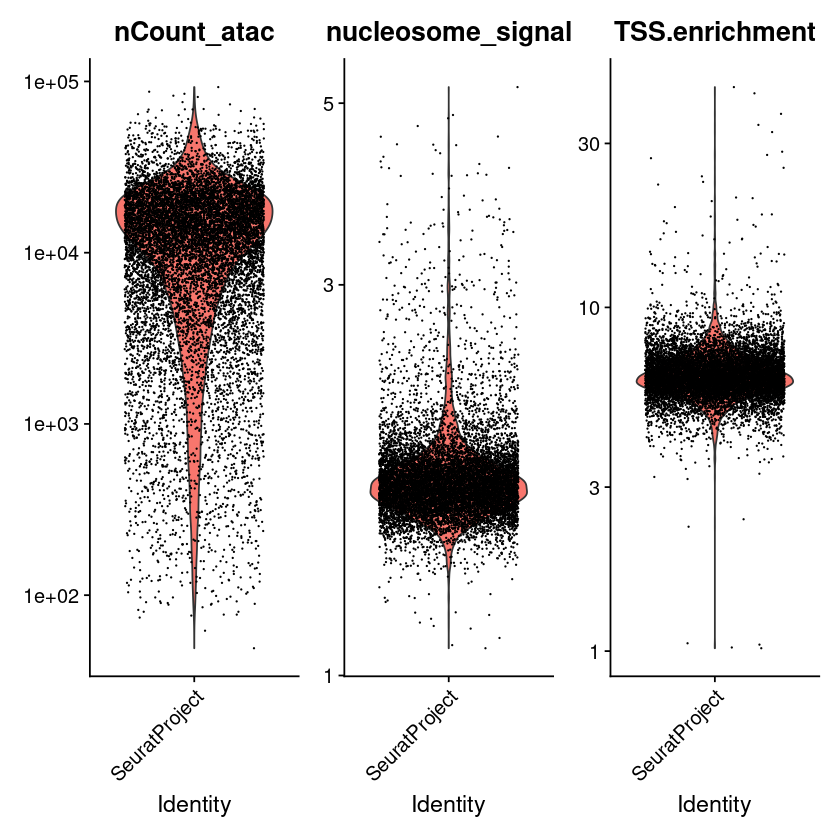

An object of class Seurat 
128668 features across 9852 samples within 1 assay 
Active assay: atac (128668 features, 0 variable features)

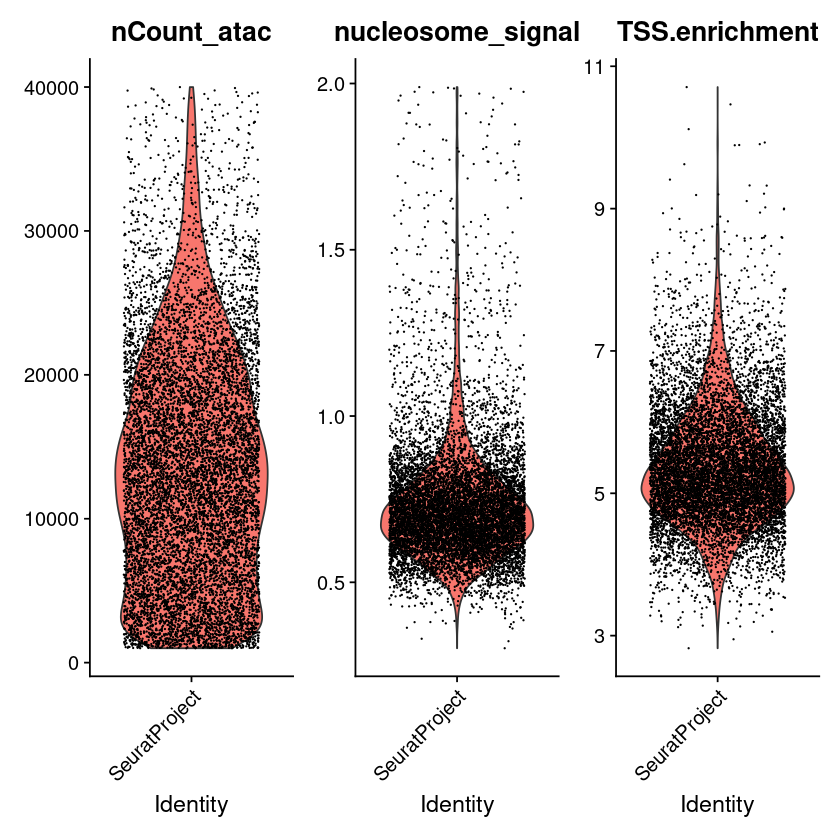

In [3]:
# ATAC
atac <- gen_atac(frag_path, cells = colnames(rna))
VlnPlot(atac, c("nCount_atac", "nucleosome_signal", "TSS.enrichment"),
        pt.size = 0.001, ncol = 3, log = T) + NoLegend()
atac
# QC
atac <- subset(atac, subset =
    nCount_atac > 1000 & nCount_atac < 4e4 &
    nucleosome_signal < 2 &
    TSS.enrichment > 2
)
atac <- subset(atac, features = rownames(atac)[rowSums(atac$atac@counts > 0) > 5])
VlnPlot(atac, c("nCount_atac", "nucleosome_signal", "TSS.enrichment"),
        pt.size = 0.001, ncol = 3, log = F) + NoLegend()
atac

In [4]:
# Get intersected cells satisfying QC metrics of all modalities
cell_ids <- Reduce(intersect, list(colnames(atac), colnames(rna)))
atac <- subset(atac, cells = cell_ids)
rna <- subset(rna, cells = cell_ids)
atac
rna

An object of class Seurat 
128668 features across 9852 samples within 1 assay 
Active assay: atac (128668 features, 0 variable features)

An object of class Seurat 
26828 features across 9852 samples within 1 assay 
Active assay: rna (26828 features, 0 variable features)

In [ ]:
# preprocess and save data
preprocess(output_dir, atac = atac, rna = rna)